In [4]:
import pandas as pd
titanic = pd.read_csv('泰坦尼克号数据集.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
X = titanic[['Pclass','Age','Sex']]
y = titanic['Survived']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Sex     891 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [9]:
## 缺失值填充
X['Age'].fillna(X['Age'].mean(),inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
X = pd.get_dummies(X)

In [11]:
X

,Pclass,Age,Sex_female,Sex_male
0,3,22.000000,0,1
1,1,38.000000,1,0
2,3,26.000000,1,0
3,1,35.000000,1,0
4,3,35.000000,0,1
...,...,...,...,...
886,2,27.000000,0,1
887,1,19.000000,1,0
888,3,29.699118,1,0
889,1,26.000000,0,1


In [12]:
y.value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)
y_predict_train = dtc.predict(X_train)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8340807174887892

In [16]:
accuracy_score(y_predict_train,y_train)

0.8772455089820359

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test,target_names =['died','survived']))

              precision    recall  f1-score   support

        died       0.90      0.84      0.87       143
    survived       0.74      0.82      0.78        80

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.82       223
weighted avg       0.84      0.83      0.84       223


In [18]:
X.columns

Index(['Pclass', 'Age', 'Sex_female', 'Sex_male'], dtype='object')

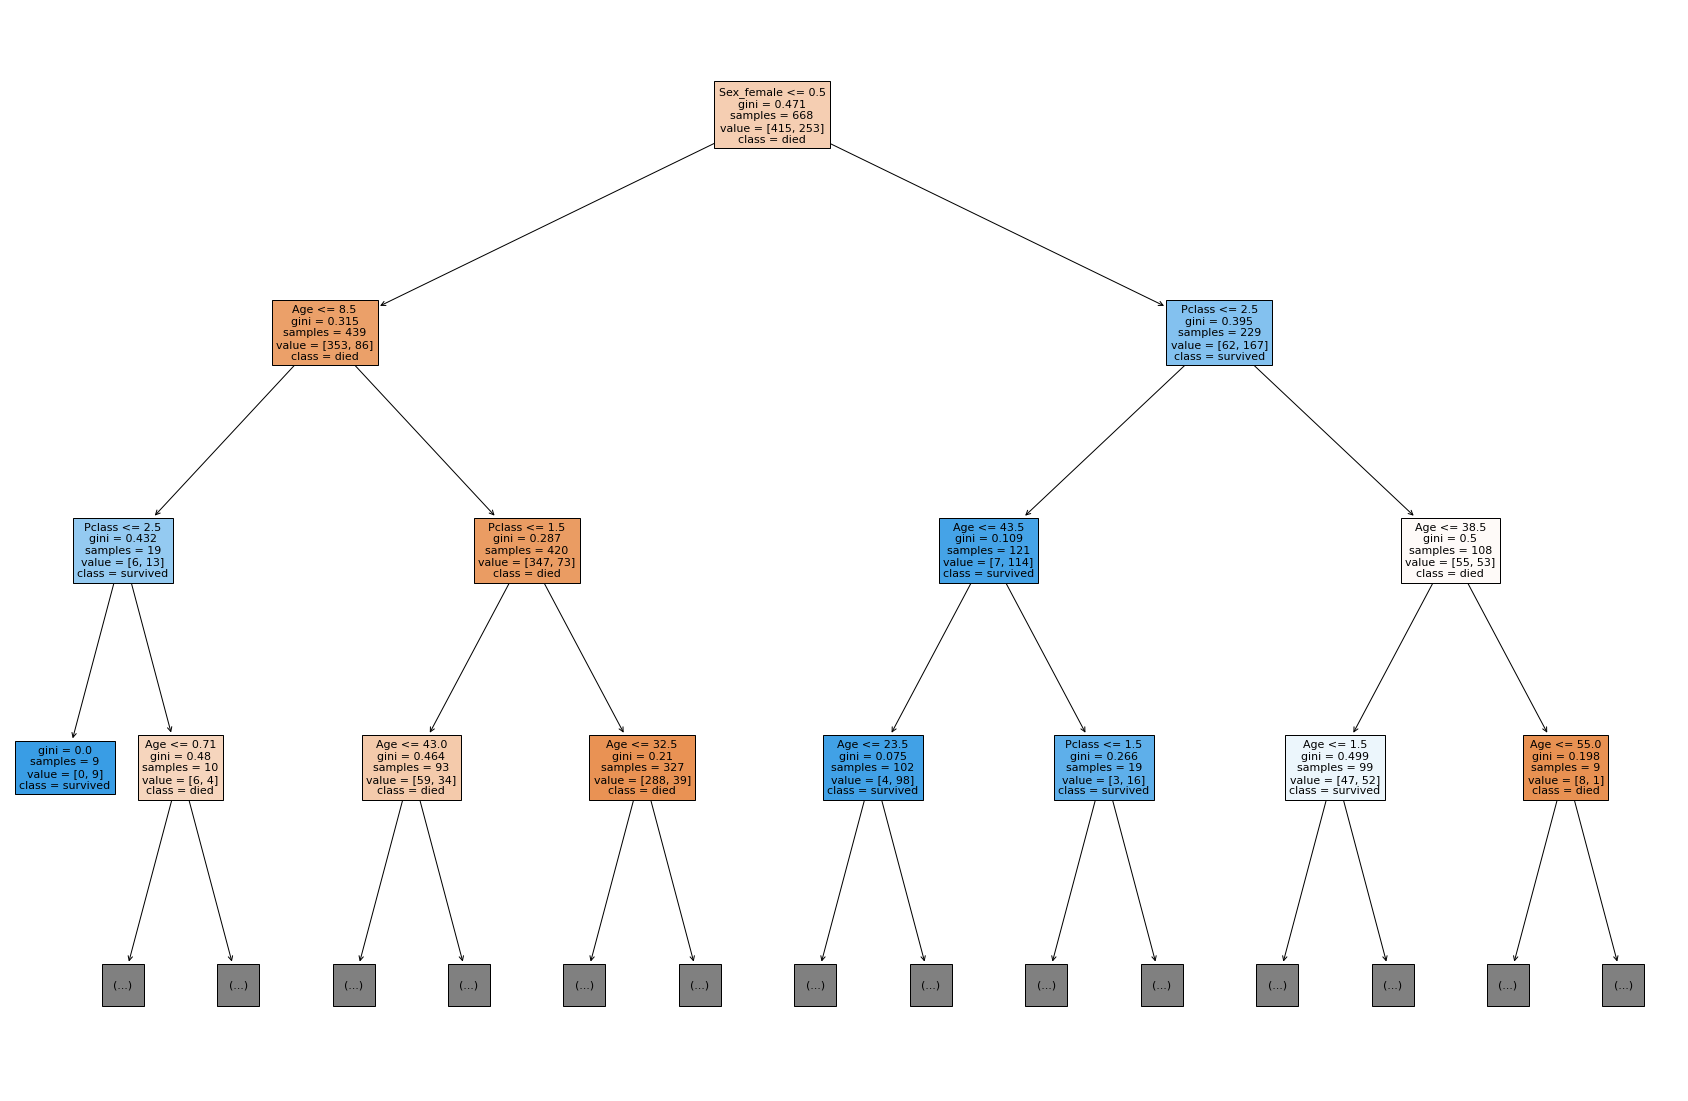

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(dtc,max_depth=3,filled = True,feature_names =['Pclass', 'Age', 'Sex_female', 'Sex_male'],class_names = ['died','survived'])
plt.show(
    
)